In [1]:
import os
import sys
from pathlib import Path

from df_collector import df_collector
from model_settings import ms
ms.find_root(Path())
parameter_dir = os.path.join(ms.root,ms.MacDirEx,ms.tuned_parameters)
sys.path.append(parameter_dir)
os.listdir(parameter_dir)

['.DS_Store', '__pycache__', 'asian_parameters.py', 'barrier_parameters.py']

In [2]:
df_collector.root = os.path.join(ms.root,ms.MacDirEx)

In [3]:
data = df_collector.cboe_spx_barriers().iloc[:,1:]

In [4]:
data

,spot_price,strike_price,barrier,days_to_maturity,updown,outin,w,barrier_type_name,rebate,dividend_rate,risk_free_rate,theta,kappa,rho,eta,v0,calculation_date,date,barrier_price
0,3002.0,2701.8,1501.0,60,Down,Out,call,DownOut,0.0,0.018889,0.019312,0.008029,1.624861e+01,-0.713819,2.762258,0.086068,2019-07-17 16:05:17.719,2019-07-17,3.191073e+02
1,3002.0,2701.8,1501.0,60,Down,Out,put,DownOut,0.0,0.018889,0.019312,0.008029,1.624861e+01,-0.713819,2.762258,0.086068,2019-07-17 16:05:17.719,2019-07-17,1.740564e+01
2,3002.0,2701.8,1501.0,60,Down,In,call,DownIn,0.0,0.018889,0.019312,0.008029,1.624861e+01,-0.713819,2.762258,0.086068,2019-07-17 16:05:17.719,2019-07-17,0.000000e+00
3,3002.0,2701.8,1501.0,60,Down,In,put,DownIn,0.0,0.018889,0.019312,0.008029,1.624861e+01,-0.713819,2.762258,0.086068,2019-07-17 16:05:17.719,2019-07-17,0.000000e+00
4,3002.0,2701.8,1501.0,90,Down,Out,call,DownOut,0.0,0.018889,0.019312,0.008029,1.624861e+01,-0.713819,2.762258,0.086068,2019-07-17 16:05:17.719,2019-07-17,3.210960e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067275,1510.0,1661.0,2265.0,540,Up,In,put,UpIn,0.0,0.021633,0.001370,0.099954,1.355126e-08,-0.748525,0.503691,0.031402,2013-03-01 11:23:47.456,2013-03-01,8.288184e+02
4067276,1510.0,1661.0,2265.0,720,Up,Out,call,UpOut,0.0,0.021633,0.001370,0.099954,1.355126e-08,-0.748525,0.503691,0.031402,2013-03-01 11:23:47.456,2013-03-01,0.000000e+00
4067277,1510.0,1661.0,2265.0,720,Up,Out,put,UpOut,0.0,0.021633,0.001370,0.099954,1.355126e-08,-0.748525,0.503691,0.031402,2013-03-01 11:23:47.456,2013-03-01,4.864116e-07
4067278,1510.0,1661.0,2265.0,720,Up,In,call,UpIn,0.0,0.021633,0.001370,0.099954,1.355126e-08,-0.748525,0.503691,0.031402,2013-03-01 11:23:47.456,2013-03-01,NaN


In [5]:
from convsklearn import relativize
data = relativize(data)

/Users/doomd/myvenv/lib/python3.12/site-packages/convsklearn/relativize.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['relative_spot'] = data['spot_price']/data_strikes
/Users/doomd/myvenv/lib/python3.12/site-packages/convsklearn/relativize.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[relative_pricename] = data[pricename]/data_strikes
/Users/doomd/myvenv/lib/python3.12/site-packages/convsklearn/relativize.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [6]:
import numpy as np
def noisify(x):
    return x + np.random.normal(scale=x*0.01)

relative_pricename = [n for n in data.columns if n.find('relative_')!=-1 and n.find('_price')!=-1][0]
relative_observed = data[relative_pricename].values
relative_observed[relative_observed>0] = noisify(relative_observed[relative_observed>0])
targetname = 'relative_observed'
data[targetname]= relative_observed
data[targetname].describe()

/var/folders/wm/l4d2lkhd26d2jfjp96l39ppm0000gn/T/ipykernel_2407/482789886.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[targetname]= relative_observed


count    3.847361e+06
mean     4.878601e-02
std      9.549176e-02
min      0.000000e+00
25%      3.361456e-04
50%      1.264760e-02
75%      5.957296e-02
max      1.091709e+00
Name: relative_observed, dtype: float64

In [7]:
from convsklearn import convsklearn
trainer = convsklearn()

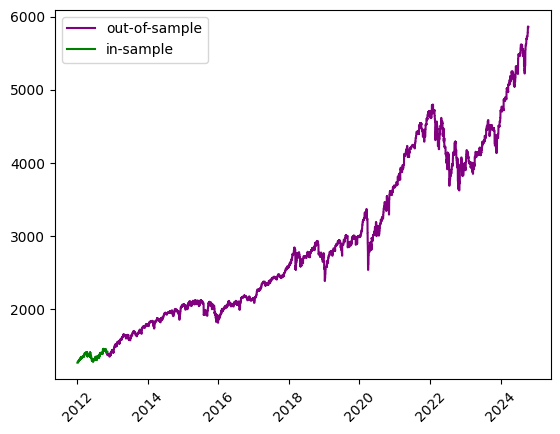

In [8]:

trainer.excluded_features = trainer.excluded_features + ['spot_price','strike_price','barrier','rebate',relative_pricename,'relative_observed']
trainer.load_data(data)
dates = data['date'].sort_values().drop_duplicates().reset_index(drop=True)
development_dates = dates[:100]
test_dates = dates[~dates.isin(development_dates)]
trainer.target_name = targetname
trainer.preprocess_data(development_dates=development_dates,test_dates=test_dates)

In [9]:
help(trainer)

Help on convsklearn in module convsklearn.convsklearn object:

class convsklearn(builtins.object)
 |  convsklearn(target_name='observed_price', excluded_features=['barrier_price', 'asian_price', 'observed_price', 'outin', 'updown', 'n_fixings'], seed=1312)
 |
 |  a proprietary class of convenience wrappers for sklearn
 |
 |  Methods defined here:
 |
 |  __init__(self, target_name='observed_price', excluded_features=['barrier_price', 'asian_price', 'observed_price', 'outin', 'updown', 'n_fixings'], seed=1312)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  fit_mlp(self, print_details=True)
 |
 |  fit_scaled_target_mlp(self, print_details=True)
 |
 |  load_data(self, data)
 |
 |  preprocess_data(self, development_dates, test_dates, plot=True)
 |
 |  test_prediction_accuracy(self)
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __w

In [10]:
trainer.fit_mlp()
trainer.test_prediction_accuracy()


training on 266781 samples...

hidden_layer_sizes: (10, 10)
max_iter: 500
random_state: 1312
cpu: 2.629999876022339

in sample:
     RMSE: 0.025376469048032653
     MAE: 0.0148349278785858

out of sample:
     RMSE: 0.38061763029798557
     MAE: 0.23818551447337868


{'train_data':          spot_price  strike_price   barrier  days_to_maturity updown outin  \
 1871096      1274.0        1274.0   949.130               180   Down   Out   
 1871365      1274.0        1337.7  1105.195               360   Down   Out   
 1871366      1274.0        1337.7  1105.195               360   Down    In   
 1871367      1274.0        1337.7  1105.195               360   Down    In   
 1871368      1274.0        1337.7  1105.195               540   Down   Out   
 ...             ...           ...       ...               ...    ...   ...   
 1323483      1420.0        1420.0  1434.200                60     Up    In   
 1323484      1420.0        1420.0  1434.200                90     Up   Out   
 1323485      1420.0        1420.0  1434.200                90     Up   Out   
 1323475      1420.0        1384.5  2130.000               540     Up    In   
 1323359      1420.0        1349.0  2130.000               720     Up    In   
 
             w barrier_type_name  re